In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns

import scipy
import sklearn.ensemble as ensemble
import statsmodels.api as smodel
import matplotlib.pyplot as plt

/Users/dsuarezsouto/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/dsuarezsouto/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/dsuarezsouto/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
fulldata = [train,test]

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Feature Engineering 

### Pclass

In [5]:
print(train['Pclass'].isna().sum())
print(test['Pclass'].isna().sum())

0
0


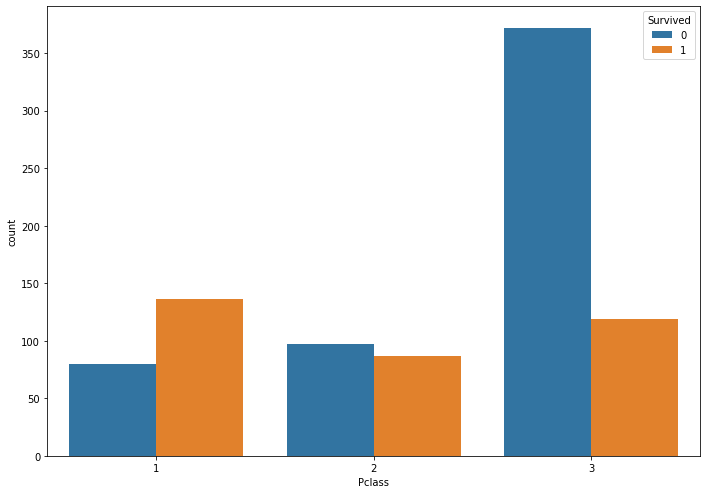

In [6]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.countplot(x="Pclass",hue="Survived", data=train,ax=ax)

### Sex

In [7]:
print(train['Sex'].isna().sum())
print(test['Sex'].isna().sum())

0
0


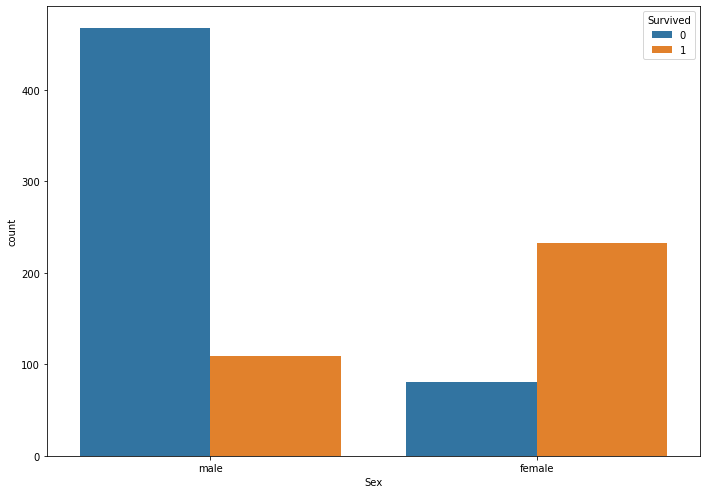

In [8]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.countplot(x="Sex",hue="Survived", data=train,ax=ax)

### Age

In [9]:
print(train['Age'].isna().sum())
print(test['Age'].isna().sum())

177
86


In [10]:
#Fill missing values with random int between [mean-std,mean+std]
for dataset in fulldata:
    age_mean = dataset['Age'].mean()
    age_std = dataset['Age'].mean()
    age_null_count = dataset['Age'].isna().sum()
    
    age_null_list = np.random.randint(age_mean-age_std,age_mean+age_std,size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_list
    dataset['Age'] = dataset['Age'].astype(int)


/Users/dsuarezsouto/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
print(train['Age'].isna().sum())
print(test['Age'].isna().sum())

0
0


In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [13]:
for dataset in fulldata:
    dataset['Range Age'] = pd.cut(dataset['Age'],5)
train[['Survived','Range Age']].groupby('Range Age').mean()

,Survived
Range Age,
"(-0.08, 16.0]",0.453237
"(16.0, 32.0]",0.372796
"(32.0, 48.0]",0.372000
"(48.0, 64.0]",0.393617
"(64.0, 80.0]",0.090909


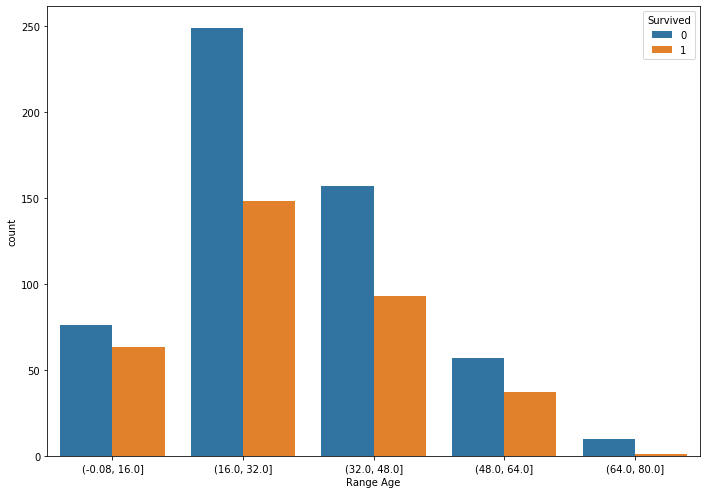

In [14]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.countplot(x="Range Age",hue="Survived", data=train,ax=ax)

### SibSp and Parch 

In [15]:
print(train['SibSp'].isnull().sum())
print(test['SibSp'].isnull().sum())
print(train['Parch'].isnull().sum())
print(test['Parch'].isnull().sum())

0
0
0
0


In [16]:
train[['SibSp','Survived']].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [17]:
train[['Parch','Survived']].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [18]:
for dataset in fulldata:
    familySize = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['Family Size'] = familySize

In [19]:
train[['Family Size','Survived']].groupby('Family Size').mean()

,Survived
Family Size,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


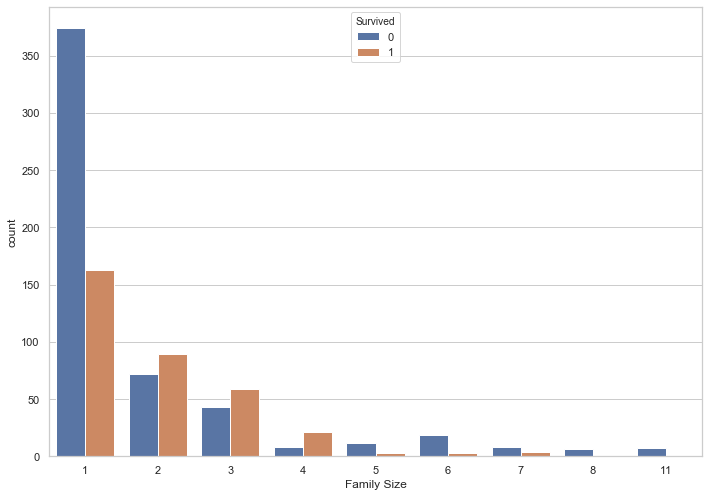

In [20]:
sns.set(style="whitegrid")

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.countplot(x="Family Size",hue="Survived", data=train,ax=ax)

We appreciate a high rate of not survived passengers in groups of family size equal to 1 or higher of 4 people. Thus, I create a new variable with 3 groups of Family Size

In [21]:
for dataset in fulldata:
    dataset['Family Size Categorical'] = 'small'
    dataset.loc[dataset['Family Size'] == 1,'Family Size Categorical'] = 'single'
    dataset.loc[dataset['Family Size'] > 4,'Family Size Categorical'] = 'big'

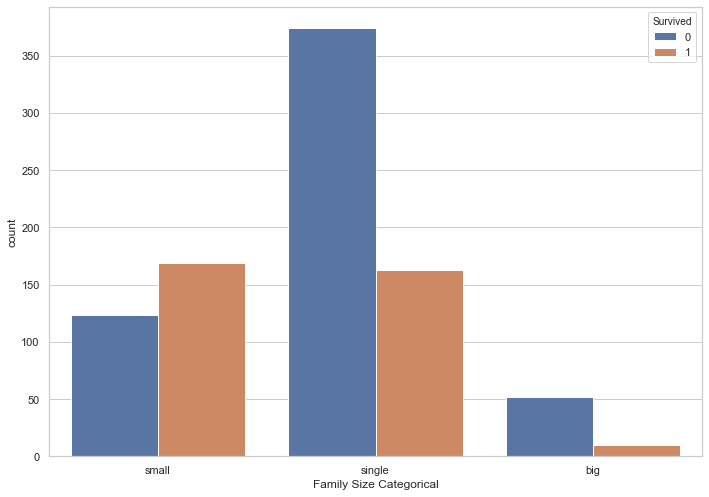

In [22]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.countplot(x="Family Size Categorical",hue="Survived", data=train,ax=ax)

### Name

In [23]:
import re

def getTitle(name):
    return re.search("\w+\.",name)[0][:-1]

for dataset in fulldata:
        dataset['Title'] = dataset['Name'].apply(lambda name : getTitle(name))

In [24]:
train.groupby('Title').count()['PassengerId']

Title
Capt          1
Col           2
Countess      1
Don           1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       40
Miss        182
Mlle          2
Mme           1
Mr          517
Mrs         125
Ms            1
Rev           6
Sir           1
Name: PassengerId, dtype: int64

We see several Titles that rarely appear in our data. We will group all of these rare titles in a category of rare title

In [25]:
countTitles = train.groupby('Title').count()['PassengerId']
rareTitles = countTitles[countTitles<10].index.values
rareTitles = np.append(rareTitles,['Dona'])

In [26]:
def getTitleRare(title):
    if title in rareTitles:
        if title == 'Mlle' or title == 'Ms':
            return "Miss"
        elif title == "Mme" or title == 'Dona':
            return "Mrs"
        else:
            return "Rare Title"
    else:
        return title
        
for dataset in fulldata:
        dataset['Title'] = dataset['Title'].apply(lambda title : getTitleRare(title))

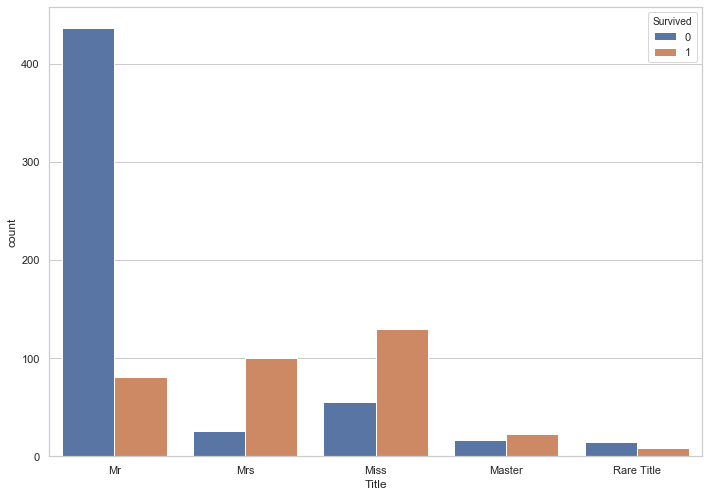

In [27]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.countplot(x="Title",hue="Survived", data=train,ax=ax)

In [28]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Range Age',
       'Family Size', 'Family Size Categorical', 'Title'],
      dtype='object')

### Embarked 

In [29]:
print(train['Embarked'].isnull().sum())
print(test['Embarked'].isnull().sum())

2
0


In [30]:
train['Embarked'].groupby(train['Embarked']).count()

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

As the most frequent Embarked value is `S` and we there are just 2 missing values, we will fill these with `S`


In [31]:
train['Embarked'] = train['Embarked'].fillna('S')

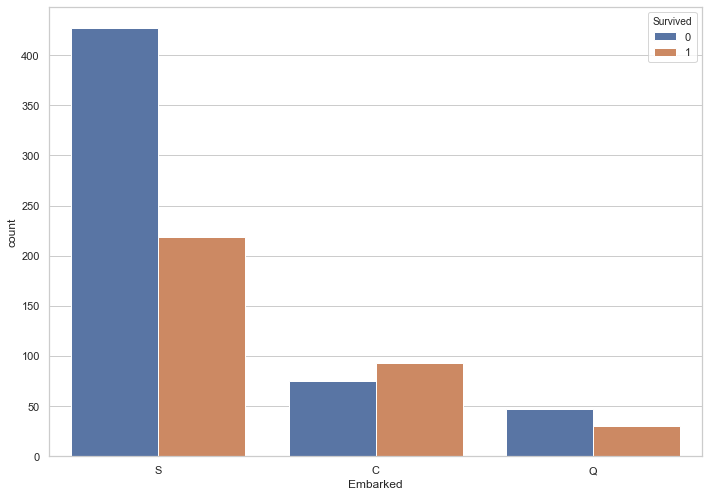

In [32]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.countplot(x="Embarked",hue="Survived", data=train,ax=ax)

## Predict 

### Feature Importance 

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
PassengerId                891 non-null int64
Survived                   891 non-null int64
Pclass                     891 non-null int64
Name                       891 non-null object
Sex                        891 non-null object
Age                        891 non-null int64
SibSp                      891 non-null int64
Parch                      891 non-null int64
Ticket                     891 non-null object
Fare                       891 non-null float64
Cabin                      204 non-null object
Embarked                   891 non-null object
Range Age                  891 non-null category
Family Size                891 non-null int64
Family Size Categorical    891 non-null object
Title                      891 non-null object
dtypes: category(1), float64(1), int64(7), object(7)
memory usage: 105.6+ KB


In [34]:
catFeatures = ['Pclass','Sex','Embarked','Range Age','Family Size Categorical','Title']
intFeatures = ['Age','Family Size']
for catFeature in catFeatures:
    for dataset in fulldata:
        dataset[catFeature]=dataset[catFeature].astype('category')

In [35]:
# Define a function that performs the Chi-square test
def ChiSquareTest (
    xCat,           # input categorical feature
    yCat,           # input categorical target variable
    debug = 'N'     # debugging flag (Y/N) 
    ):

    obsCount = pd.crosstab(index = xCat, columns = yCat, margins = False, dropna = True)
    cTotal = obsCount.sum(axis = 1)
    rTotal = obsCount.sum(axis = 0)
    nTotal = np.sum(rTotal)
    expCount = np.outer(cTotal, (rTotal / nTotal))

    if (debug == 'Y'):
        print('Observed Count:\n', obsCount)
        print('Column Total:\n', cTotal)
        print('Row Total:\n', rTotal)
        print('Overall Total:\n', nTotal)
        print('Expected Count:\n', expCount)
        print('\n')
       
    chiSqStat = ((obsCount - expCount)**2 / expCount).to_numpy().sum()
    chiSqDf = (obsCount.shape[0] - 1.0) * (obsCount.shape[1] - 1.0)
    chiSqSig = scipy.stats.chi2.sf(chiSqStat, chiSqDf)

    cramerV = chiSqStat / nTotal
    if (cTotal.size > rTotal.size):
        cramerV = cramerV / (rTotal.size - 1.0)
    else:
        cramerV = cramerV / (cTotal.size - 1.0)
    cramerV = np.sqrt(cramerV)

    return(chiSqStat, chiSqDf, chiSqSig, cramerV)


In [36]:
# Define a function that performs the Deviance test
def DevianceTest (
    xInt,           # input interval feature
    yCat,           # input categorical target variable
    debug = 'N'     # debugging flag (Y/N) 
    ):

    y = yCat.astype('category')

    # Model 0 is yCat = Intercept
    X = np.where(yCat.notnull(), 1, 0)
    objLogit = smodel.MNLogit(y, X)
    thisFit = objLogit.fit(method = 'newton', full_output = True, maxiter = 100, tol = 1e-8)
    thisParameter = thisFit.params
    LLK0 = objLogit.loglike(thisParameter.values)

    if (debug == 'Y'):
        print(thisFit.summary())
        print("Model Log-Likelihood Value =", LLK0)
        print('\n')

    # Model 1 is yCat = Intercept + xInt
    X = smodel.add_constant(xInt, prepend = True)
    objLogit = smodel.MNLogit(y, X)
    thisFit = objLogit.fit(method = 'newton', full_output = True, maxiter = 100, tol = 1e-8)
    thisParameter = thisFit.params
    LLK1 = objLogit.loglike(thisParameter.values)

    if (debug == 'Y'):
        print(thisFit.summary())
        print("Model Log-Likelihood Value =", LLK1)

    # Calculate the deviance
    devianceStat = 2.0 * (LLK1 - LLK0)
    devianceDf = (len(y.cat.categories) - 1.0)
    devianceSig = scipy.stats.chi2.sf(devianceStat, devianceDf)

    mcFaddenRSq = 1.0 - (LLK1 / LLK0)

    return(devianceStat, devianceDf, devianceSig, mcFaddenRSq)

In [37]:
testResult = pd.DataFrame(index = catFeatures + intFeatures,
                              columns = ['Test', 'Statistic', 'DF', 'Significance', 'Association', 'Measure'])

for pred in catFeatures:
    chiSqStat, chiSqDf, chiSqSig, cramerV = ChiSquareTest(train[pred], train['Survived'], debug = 'F')
    testResult.loc[pred] = ['Chi-square', chiSqStat, chiSqDf, chiSqSig, 'Cramer''V', cramerV]
    
for pred in intFeatures:
    devianceStat, devianceDf, devianceSig, mcFaddenRSq = DevianceTest(train[pred], train['Survived'], debug = 'F')
    testResult.loc[pred] = ['Deviance', devianceStat, devianceDf, devianceSig, 'McFadden''s R^2', mcFaddenRSq]

rankSig = testResult.sort_values('Significance', axis = 0, ascending = True)
rankAssoc = testResult.sort_values('Measure', axis = 0, ascending = False)


Optimization terminated successfully.
         Current function value: 0.665912
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.664271
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.665912
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.665774
         Iterations 4


/Users/dsuarezsouto/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [38]:
rankSig

,Test,Statistic,DF,Significance,Association,Measure
Title,Chi-square,288.118,4,3.95786e-61,CramerV,0.568652
Sex,Chi-square,263.051,1,3.71175e-59,CramerV,0.543351
Pclass,Chi-square,102.889,2,4.54925e-23,CramerV,0.339817
Family Size Categorical,Chi-square,74.5372,2,6.52292e-17,CramerV,0.289233
Embarked,Chi-square,25.9645,2,2.30086e-06,CramerV,0.170707
Age,Deviance,2.92379,1,0.0872829,McFaddens R^2,0.00246389
Range Age,Chi-square,7.21237,4,0.125082,CramerV,0.0899705
Family Size,Deviance,0.245051,1,0.620581,McFaddens R^2,0.000206506


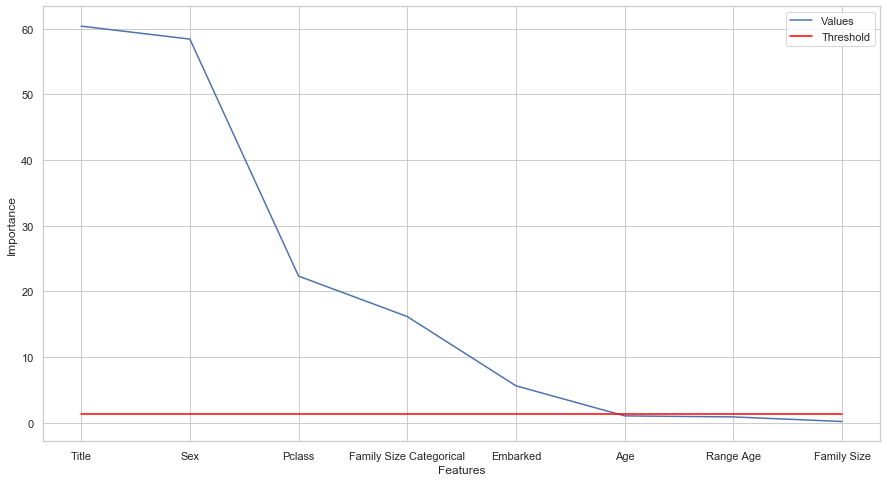

In [39]:
import math
fig,ax = plt.subplots(figsize=(15,8))
y=rankSig['Significance'].apply(lambda x : -math.log10(x))
x=rankSig.index

ax.plot(x,y,label='Values')
ax.plot(x,np.full(len(x),-math.log10(0.05)),color='red',label='Threshold')
ax.set_ylabel('Importance')
ax.set_xlabel('Features')
ax.legend(loc='best')

In [40]:
rankAssoc

,Test,Statistic,DF,Significance,Association,Measure
Title,Chi-square,288.118,4,3.95786e-61,CramerV,0.568652
Sex,Chi-square,263.051,1,3.71175e-59,CramerV,0.543351
Pclass,Chi-square,102.889,2,4.54925e-23,CramerV,0.339817
Family Size Categorical,Chi-square,74.5372,2,6.52292e-17,CramerV,0.289233
Embarked,Chi-square,25.9645,2,2.30086e-06,CramerV,0.170707
Range Age,Chi-square,7.21237,4,0.125082,CramerV,0.0899705
Age,Deviance,2.92379,1,0.0872829,McFaddens R^2,0.00246389
Family Size,Deviance,0.245051,1,0.620581,McFaddens R^2,0.000206506


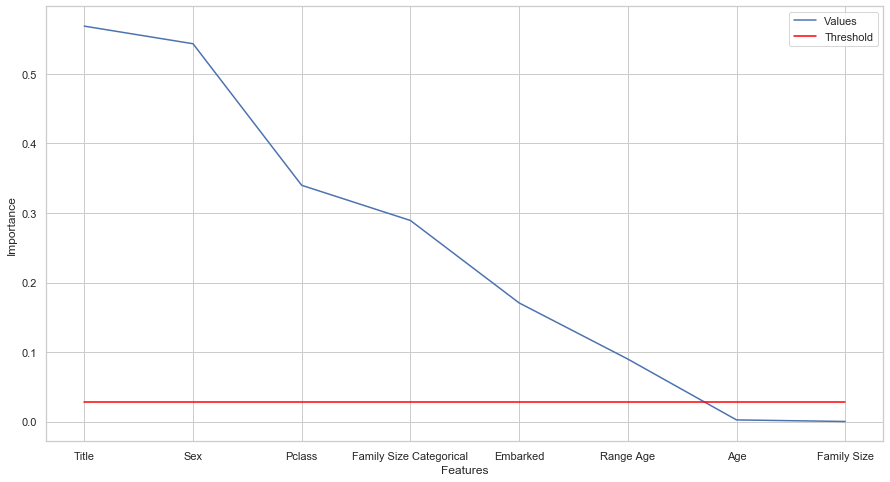

In [41]:
fig,ax = plt.subplots(figsize=(15,8))
y=rankAssoc['Measure']
x=rankAssoc.index

ax.plot(x,y,label='Values')
ax.plot(x,np.full(len(x),0.05*y.values[0]),color='red',label='Threshold')
ax.set_ylabel('Importance')
ax.set_xlabel('Features')
ax.legend(loc='best')

As it can be appreciated from the above plots, we have similar results in the significance and association tests. The unique difference is for the feature Age that pass the significance test but not the assofication test. Thus, the features we will use are `[Title,Sex,Pclass, Family Size Categorical,Embarked,Range Age]`

## Modelling 

### Classifiers 

I will compare the performance of 6 classifiers using Stratified KFold strategy:

1. Decision Tree
2. Random Forest
3. Logistic Regression
4. SVC
5. AdaBoosting
6. Gradient Tree Boosting

In [72]:
features=['Title','Sex','Pclass','Family Size Categorical','Embarked','Range Age']
X_train = train[features]
X_train = pd.get_dummies(X_train)
y_train = train['Survived']

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold

random_state = 1

classifiers = [
    DecisionTreeClassifier(random_state=random_state),
    RandomForestClassifier(random_state=random_state,n_estimators=100),
    LogisticRegression(random_state=random_state),
    SVC(random_state=random_state),
    AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=random_state),n_estimators=150,random_state=random_state),
    GradientBoostingClassifier(random_state=random_state)
]

kFold = StratifiedKFold(n_splits=5)

In [107]:
from sklearn.model_selection import cross_val_score

results_list = []
for clf in classifiers:
    scores = cross_val_score(clf,X_train,y_train,cv=kFold)
    result = {}
    result['Classifier'] = type(clf).__name__
    result['Accuracy_Mean'] = scores.mean()
    result['Accuracy_STD'] = scores.std()
    results_list.append(result)

results = pd.DataFrame(results_list)

/Users/dsuarezsouto/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dsuarezsouto/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dsuarezsouto/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dsuarezsouto/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dsuarezsouto/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: 

In [118]:
results

,Classifier,Accuracy_Mean,Accuracy_STD
0,DecisionTreeClassifier,0.803651,0.024349
1,RandomForestClassifier,0.804787,0.026355
2,LogisticRegression,0.823807,0.016759
3,SVC,0.828301,0.019481
4,AdaBoostClassifier,0.800274,0.021562
5,GradientBoostingClassifier,0.812628,0.023334


### Hyperparameters 

In [117]:
#Decision Tree
from sklearn.model_selection import GridSearchCV

param_DT = {
            'criterion':['gini','entropy'],
            'max_features': ['auto', 'sqrt', 'log2']
           }
DT = DecisionTreeClassifier(random_state=random_state)
gridsearch_DT = GridSearchCV(DT,param_DT,cv=kFold,verbose=1,n_jobs=-1)

gridsearch_DT.fit(X_train,y_train)
best_DT = gridsearch_DT.best_estimator_
print("Decision Tree best score: {}".format(gridsearch_DT.best_score_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Decision Tree best score: 0.8080808080808081


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.1s finished


In [120]:
#Random Forest
param_RF = {
            'n_estimators': np.arange(100,350,50),
            'criterion':['gini','entropy'],
            'max_features': ['auto', 'sqrt', 'log2']
           }
RF = RandomForestClassifier(random_state=random_state)
gridsearch_RF = GridSearchCV(RF,param_RF,cv=kFold,n_jobs=-1)

gridsearch_RF.fit(X_train,y_train)
best_RF = gridsearch_RF.best_estimator_
print("Random Forest best score: {}".format(gridsearch_RF.best_score_))

Random Forest best score: 0.8069584736251403


In [127]:
#Logistic Regression
param_LR = {
            'C': [0.001,0.01,0.1,1,10],
            'solver':['liblinear','lbfgs']
           }
LR = LogisticRegression(random_state=random_state)
gridsearch_LR = GridSearchCV(LR,param_LR,cv=kFold,n_jobs=1)

gridsearch_LR.fit(X_train,y_train)
best_LR = gridsearch_LR.best_estimator_
print("Logistic Regression best score: {}".format(gridsearch_LR.best_score_))

Random Forest best score: 0.8271604938271605


In [153]:
# SVC
param_svc = {'kernel': ['rbf'], 
                  'gamma':['scale', 'auto'],
                  'C': [1, 10, 50, 100,200,300, 1000]}

SVMC = SVC(probability=True,random_state=random_state)
gridsearch_SVC = GridSearchCV(SVMC,param_svc,cv=kFold)

gridsearch_SVC.fit(X_train,y_train)
best_SVC = gridsearch_SVC.best_estimator_
print("SVC best score: {}".format(gridsearch_SVC.best_score_))

SVC best score: 0.8282828282828283


In [139]:
# Adaboost

DTC = DecisionTreeClassifier()


param_ada = {"base_estimator__criterion" : ["gini", "entropy"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2,10,10],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

adaDTC = AdaBoostClassifier(DTC, random_state=random_state)

gridsearch_ADA = GridSearchCV(adaDTC,param_grid = param_ada, cv=kFold, scoring="accuracy")

gridsearch_ADA.fit(X_train,y_train)

best_ADA = gridsearch_ADA.best_estimator_
print("ADA best score: {}".format(gridsearch_ADA.best_score_))

ADA best score: 0.8103254769921436


In [140]:
gridsearch_ADA.best_params_

{'algorithm': 'SAMME.R',
 'base_estimator__criterion': 'gini',
 'learning_rate': 0.01,
 'n_estimators': 10}

In [142]:
#Gradient Boosting
param_GB = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'max_features': [0.3, 0.1] 
            }

gradientBoosting = GradientBoostingClassifier(random_state=random_state)

gridsearch_GB = GridSearchCV(gradientBoosting,param_GB,cv=kFold)

gridsearch_GB.fit(X_train,y_train)
best_GB = gridsearch_GB.best_estimator_
print("Gradient Boosting best score: {}".format(gridsearch_GB.best_score_))

Gradient Boosting best score: 0.8294051627384961


In [143]:
gridsearch_GB.best_params_

{'learning_rate': 0.01,
 'loss': 'deviance',
 'max_depth': 4,
 'max_features': 0.1,
 'n_estimators': 200}

### Learning Curves 

In [88]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    return plt

In [144]:
best_classifiers = [best_DT,best_RF,best_LR,best_SVC,best_ADA,best_GB]

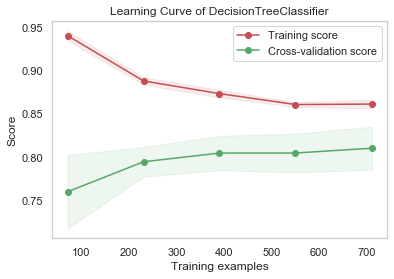

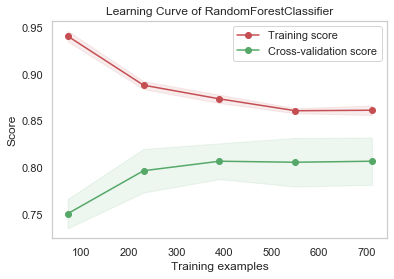

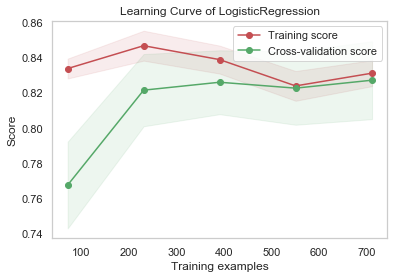

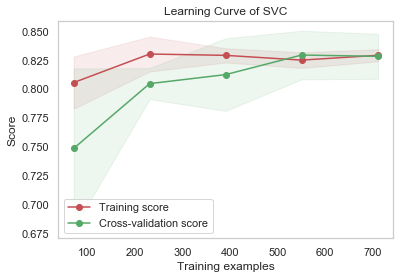

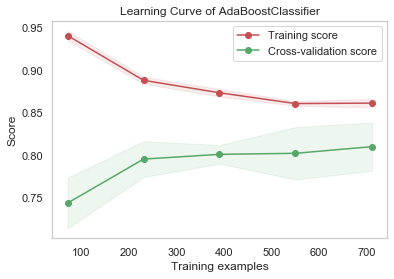

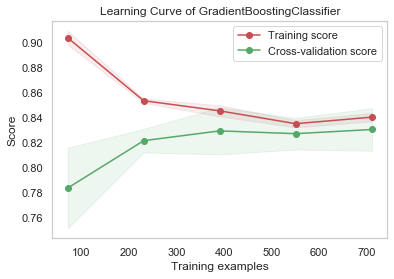

In [146]:
for clf in best_classifiers:
    title = "Learning Curve of {}".format(type(clf).__name__)
    plot_learning_curve(clf,title,X_train,y_train,cv=kFold,n_jobs=1)

In the learning curves it is not appreciated that any of the algorithms suffers from overfitting (at least in a clear way). It is worth noting the good generalization that seems to have the Gradient Boosting algorithm, as it is an algorithm that tends to suffer from overfitting

### Ensembling Modeling 

In [154]:
from sklearn.ensemble import VotingClassifier

votingCLF = VotingClassifier(estimators=[('dt',best_DT),('rf',best_RF),('lr',best_LR),
                                        ('svc',best_SVC),('ada',best_ADA),('gb',best_GB)],voting='soft')

In [155]:
votingCLF.fit(X_train,y_train)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort=False,
                                                     random_state=1,
                                                     splitter='best')),
       

In [156]:
y_pred = votingCLF.predict(X_test)

In [157]:
result = pd.DataFrame(columns=['PassengerId','Survived'])
result['PassengerId'] = test['PassengerId']
result['Survived'] = y_pred

In [158]:
result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [159]:
result.to_csv('result.csv',index=False)